In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tqdm import tqdm

### Clean Data

In [2]:
df = pd.read_excel('VOC-ALS.xlsx')

In [3]:
print(df.shape) 
df.head()# note that first row is what should be the column names

(154, 89)


,Column-1,Column-2,Column-3,Column-4,Column-5,Column-6,Column-7,Column-8,Column-9,Column-10,...,Column-80,Column-81,Column-82,Column-83,Column-84,Column-85,Column-86,Column-87,Column-88,Column-89
0,ID,Age (years),Sex,Category,OnsetRegion,Therapy,GeneticTest,DiagnosticDelay,DiseaseDuration,FVC%,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,CT001,56,F,HC,-,-,-,-,-,-,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,CT004,72,F,HC,-,-,-,-,-,-,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,CT010,60,F,HC,-,-,-,-,-,-,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,CT013,64,F,HC,-,-,-,-,-,-,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12


In [4]:
# set column names as first row
rename_map = dict([(old_name, new_name) for old_name, new_name in zip(df.axes[1], list(df.iloc[0]))])
renamed_df = df.rename(rename_map, axis=1)
renamed_df.head()

,ID,Age (years),Sex,Category,OnsetRegion,Therapy,GeneticTest,DiagnosticDelay,DiseaseDuration,FVC%,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
0,ID,Age (years),Sex,Category,OnsetRegion,Therapy,GeneticTest,DiagnosticDelay,DiseaseDuration,FVC%,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,CT001,56,F,HC,-,-,-,-,-,-,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,CT004,72,F,HC,-,-,-,-,-,-,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,CT010,60,F,HC,-,-,-,-,-,-,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,CT013,64,F,HC,-,-,-,-,-,-,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12


In [5]:
# remove diagnostic/treatments stuff as no values for healthy participants and first row (which held the column names)
clean_df = pd.concat([renamed_df.iloc[:,1:4], renamed_df.iloc[:,33:]], axis=1)[1:]
clean_df.head()

,Age (years),Sex,Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,56,F,HC,178.215501,1.780023,17.101148,0.003917,0.10771,188.704803,5.102617,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,72,F,HC,184.581568,4.82997,23.711906,0.003241,0.037427,186.589774,6.743713,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,60,F,HC,138.06451,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,64,F,HC,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12
5,62,F,HC,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,...,36.952328,14.039653,0.026335,0.103564,184.407533,30.29664,13.52561,0.028864,0.123836,3


In [6]:
# Convert category (ALS or HC) to binary so don't have to predict a string lol
binary_target = clean_df["Category"] == "ALS"
clean_df["Category"] = binary_target
clean_df.head()

,Age (years),Sex,Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,56,F,False,178.215501,1.780023,17.101148,0.003917,0.10771,188.704803,5.102617,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,72,F,False,184.581568,4.82997,23.711906,0.003241,0.037427,186.589774,6.743713,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,60,F,False,138.06451,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,64,F,False,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12
5,62,F,False,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,...,36.952328,14.039653,0.026335,0.103564,184.407533,30.29664,13.52561,0.028864,0.123836,3


In [7]:
# One-hot encode gender
is_male = clean_df["Sex"] == "M"
clean_df["gender_male"] = is_male.astype(int)
clean_df["gender_female"] = 1 - is_male
clean_df = clean_df.drop(columns="Sex")
clean_df.head()

,Age (years),Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,HNR_E,...,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire,gender_male,gender_female
1,56,False,178.215501,1.780023,17.101148,0.003917,0.10771,188.704803,5.102617,15.753448,...,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7,0,1
2,72,False,184.581568,4.82997,23.711906,0.003241,0.037427,186.589774,6.743713,24.135282,...,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0,0,1
3,60,False,138.06451,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,7.932193,...,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22,0,1
4,64,False,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,20.197039,...,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12,0,1
5,62,False,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,20.652874,...,0.026335,0.103564,184.407533,30.29664,13.52561,0.028864,0.123836,3,0,1


In [8]:
# Make sure all columns are numeric so we can display them
for name in clean_df.columns:
    clean_df[name] = pd.to_numeric(clean_df[name], errors='coerce')

### EDA

In [9]:
clean_df.head()

,Age (years),Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,HNR_E,...,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire,gender_male,gender_female
1,56,False,178.215501,1.780023,17.101148,0.003917,0.107710,188.704803,5.102617,15.753448,...,0.023379,0.113960,167.768436,15.147806,14.020984,0.017668,0.112806,7,0,1
2,72,False,184.581568,4.829970,23.711906,0.003241,0.037427,186.589774,6.743713,24.135282,...,0.013030,0.068701,195.725146,25.969098,19.756000,0.011523,0.059758,0,0,1
3,60,False,138.064510,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,7.932193,...,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22,0,1
4,64,False,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,20.197039,...,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12,0,1
5,62,False,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,20.652874,...,0.026335,0.103564,184.407533,30.296640,13.525610,0.028864,0.123836,3,0,1


In [10]:
# what proportion of examples are positive
num_positive = sum(clean_df["Category"])
print(f"{num_positive} / {len(clean_df)} =  {num_positive / len(clean_df)}")

102 / 153 =  0.6666666666666666


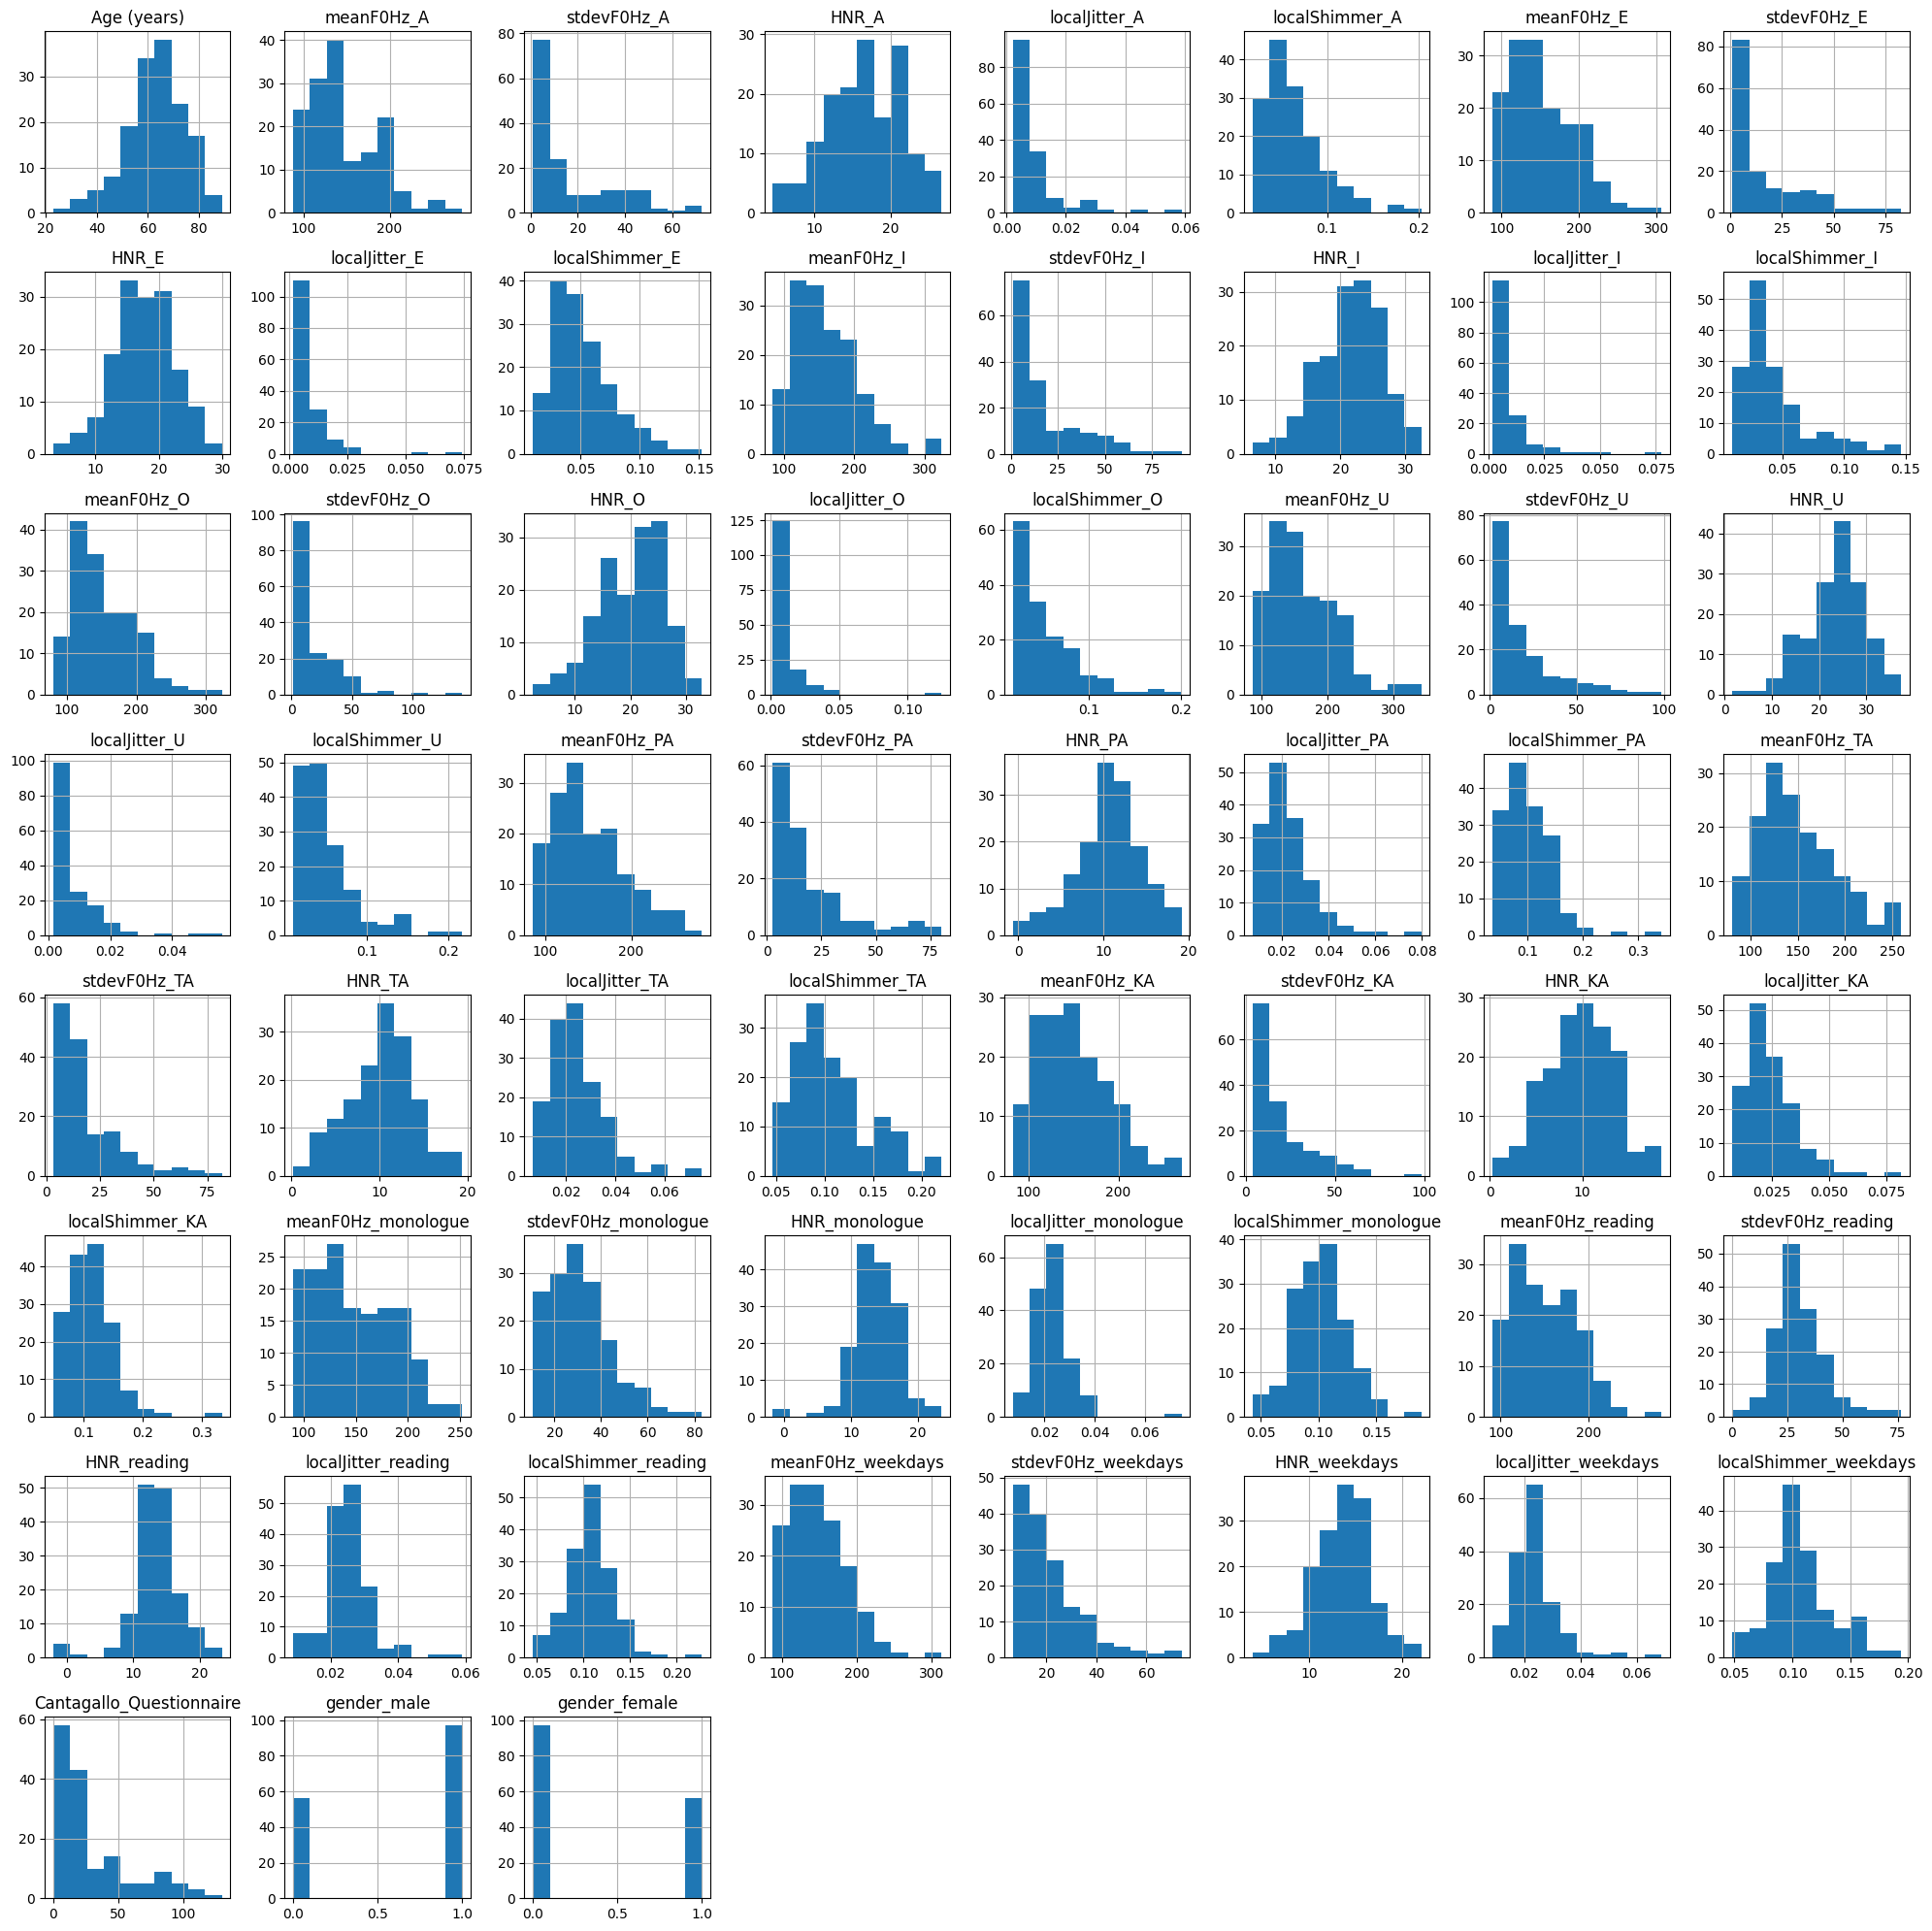

In [11]:
clean_df.hist(figsize=(20,20))
plt.tight_layout()

In [12]:
nan_counts_per_column = clean_df.isna().sum()
print(nan_counts_per_column)

Age (years)                 0
Category                    0
meanF0Hz_A                  0
stdevF0Hz_A                 0
HNR_A                       0
localJitter_A               0
localShimmer_A              0
meanF0Hz_E                  0
stdevF0Hz_E                 0
HNR_E                       0
localJitter_E               0
localShimmer_E              0
meanF0Hz_I                  0
stdevF0Hz_I                 0
HNR_I                       0
localJitter_I               0
localShimmer_I              0
meanF0Hz_O                  0
stdevF0Hz_O                 0
HNR_O                       0
localJitter_O               0
localShimmer_O              0
meanF0Hz_U                  0
stdevF0Hz_U                 0
HNR_U                       0
localJitter_U               0
localShimmer_U              0
meanF0Hz_PA                 0
stdevF0Hz_PA                0
HNR_PA                      0
localJitter_PA              0
localShimmer_PA             0
meanF0Hz_TA                 0
stdevF0Hz_

### Preprocessing

In [13]:
# get each column name so I don't have to type them all
for name in clean_df.columns:
    print(f"\"{name}\", ", end="")

"Age (years)", "Category", "meanF0Hz_A", "stdevF0Hz_A", "HNR_A", "localJitter_A", "localShimmer_A", "meanF0Hz_E", "stdevF0Hz_E", "HNR_E", "localJitter_E", "localShimmer_E", "meanF0Hz_I", "stdevF0Hz_I", "HNR_I", "localJitter_I", "localShimmer_I", "meanF0Hz_O", "stdevF0Hz_O", "HNR_O", "localJitter_O", "localShimmer_O", "meanF0Hz_U", "stdevF0Hz_U", "HNR_U", "localJitter_U", "localShimmer_U", "meanF0Hz_PA", "stdevF0Hz_PA", "HNR_PA", "localJitter_PA", "localShimmer_PA", "meanF0Hz_TA", "stdevF0Hz_TA", "HNR_TA", "localJitter_TA", "localShimmer_TA", "meanF0Hz_KA", "stdevF0Hz_KA", "HNR_KA", "localJitter_KA", "localShimmer_KA", "meanF0Hz_monologue", "stdevF0Hz_monologue", "HNR_monologue", "localJitter_monologue", "localShimmer_monologue", "meanF0Hz_reading", "stdevF0Hz_reading", "HNR_reading", "localJitter_reading", "localShimmer_reading", "meanF0Hz_weekdays", "stdevF0Hz_weekdays", "HNR_weekdays", "localJitter_weekdays", "localShimmer_weekdays", "Cantagallo_Questionnaire", "gender_male", "gender

(x - mu) / sd

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# numeric features that need standardizing
numeric_features = ["Age (years)", "meanF0Hz_A", "stdevF0Hz_A", "HNR_A", "localJitter_A", "localShimmer_A", "meanF0Hz_E", "stdevF0Hz_E", "HNR_E", "localJitter_E", "localShimmer_E", "meanF0Hz_I", "stdevF0Hz_I", "HNR_I", "localJitter_I", "localShimmer_I", "meanF0Hz_O", "stdevF0Hz_O", "HNR_O", "localJitter_O", "localShimmer_O", "meanF0Hz_U", "stdevF0Hz_U", "HNR_U", "localJitter_U", "localShimmer_U", "meanF0Hz_PA", "stdevF0Hz_PA", "HNR_PA", "localJitter_PA", "localShimmer_PA", "meanF0Hz_TA", "stdevF0Hz_TA", "HNR_TA", "localJitter_TA", "localShimmer_TA", "meanF0Hz_KA", "stdevF0Hz_KA", "HNR_KA", "localJitter_KA", "localShimmer_KA", "meanF0Hz_monologue", "stdevF0Hz_monologue", "HNR_monologue", "localJitter_monologue", "localShimmer_monologue", "meanF0Hz_reading", "stdevF0Hz_reading", "HNR_reading", "localJitter_reading", "localShimmer_reading", "meanF0Hz_weekdays", "stdevF0Hz_weekdays", "HNR_weekdays", "localJitter_weekdays", "localShimmer_weekdays", "Cantagallo_Questionnaire"]  # numerical columns
onehot_features = ["Category", 'gender_male', 'gender_female'] # no touchy

# Want to normalize numeric features (not ALS diagnosis, or one hot encoded gender)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', onehot_features)  # leave these as-is
    ]
)

p = Pipeline(steps=[
    ('preprocessor', preprocessor)])

scaled_data = p.fit_transform(clean_df)

# Convert back to DataFrame
feature_names = p.get_feature_names_out()
all_feature_names = numeric_features + onehot_features
scaled_df = pd.DataFrame(scaled_data, columns=all_feature_names, index=clean_df.index)

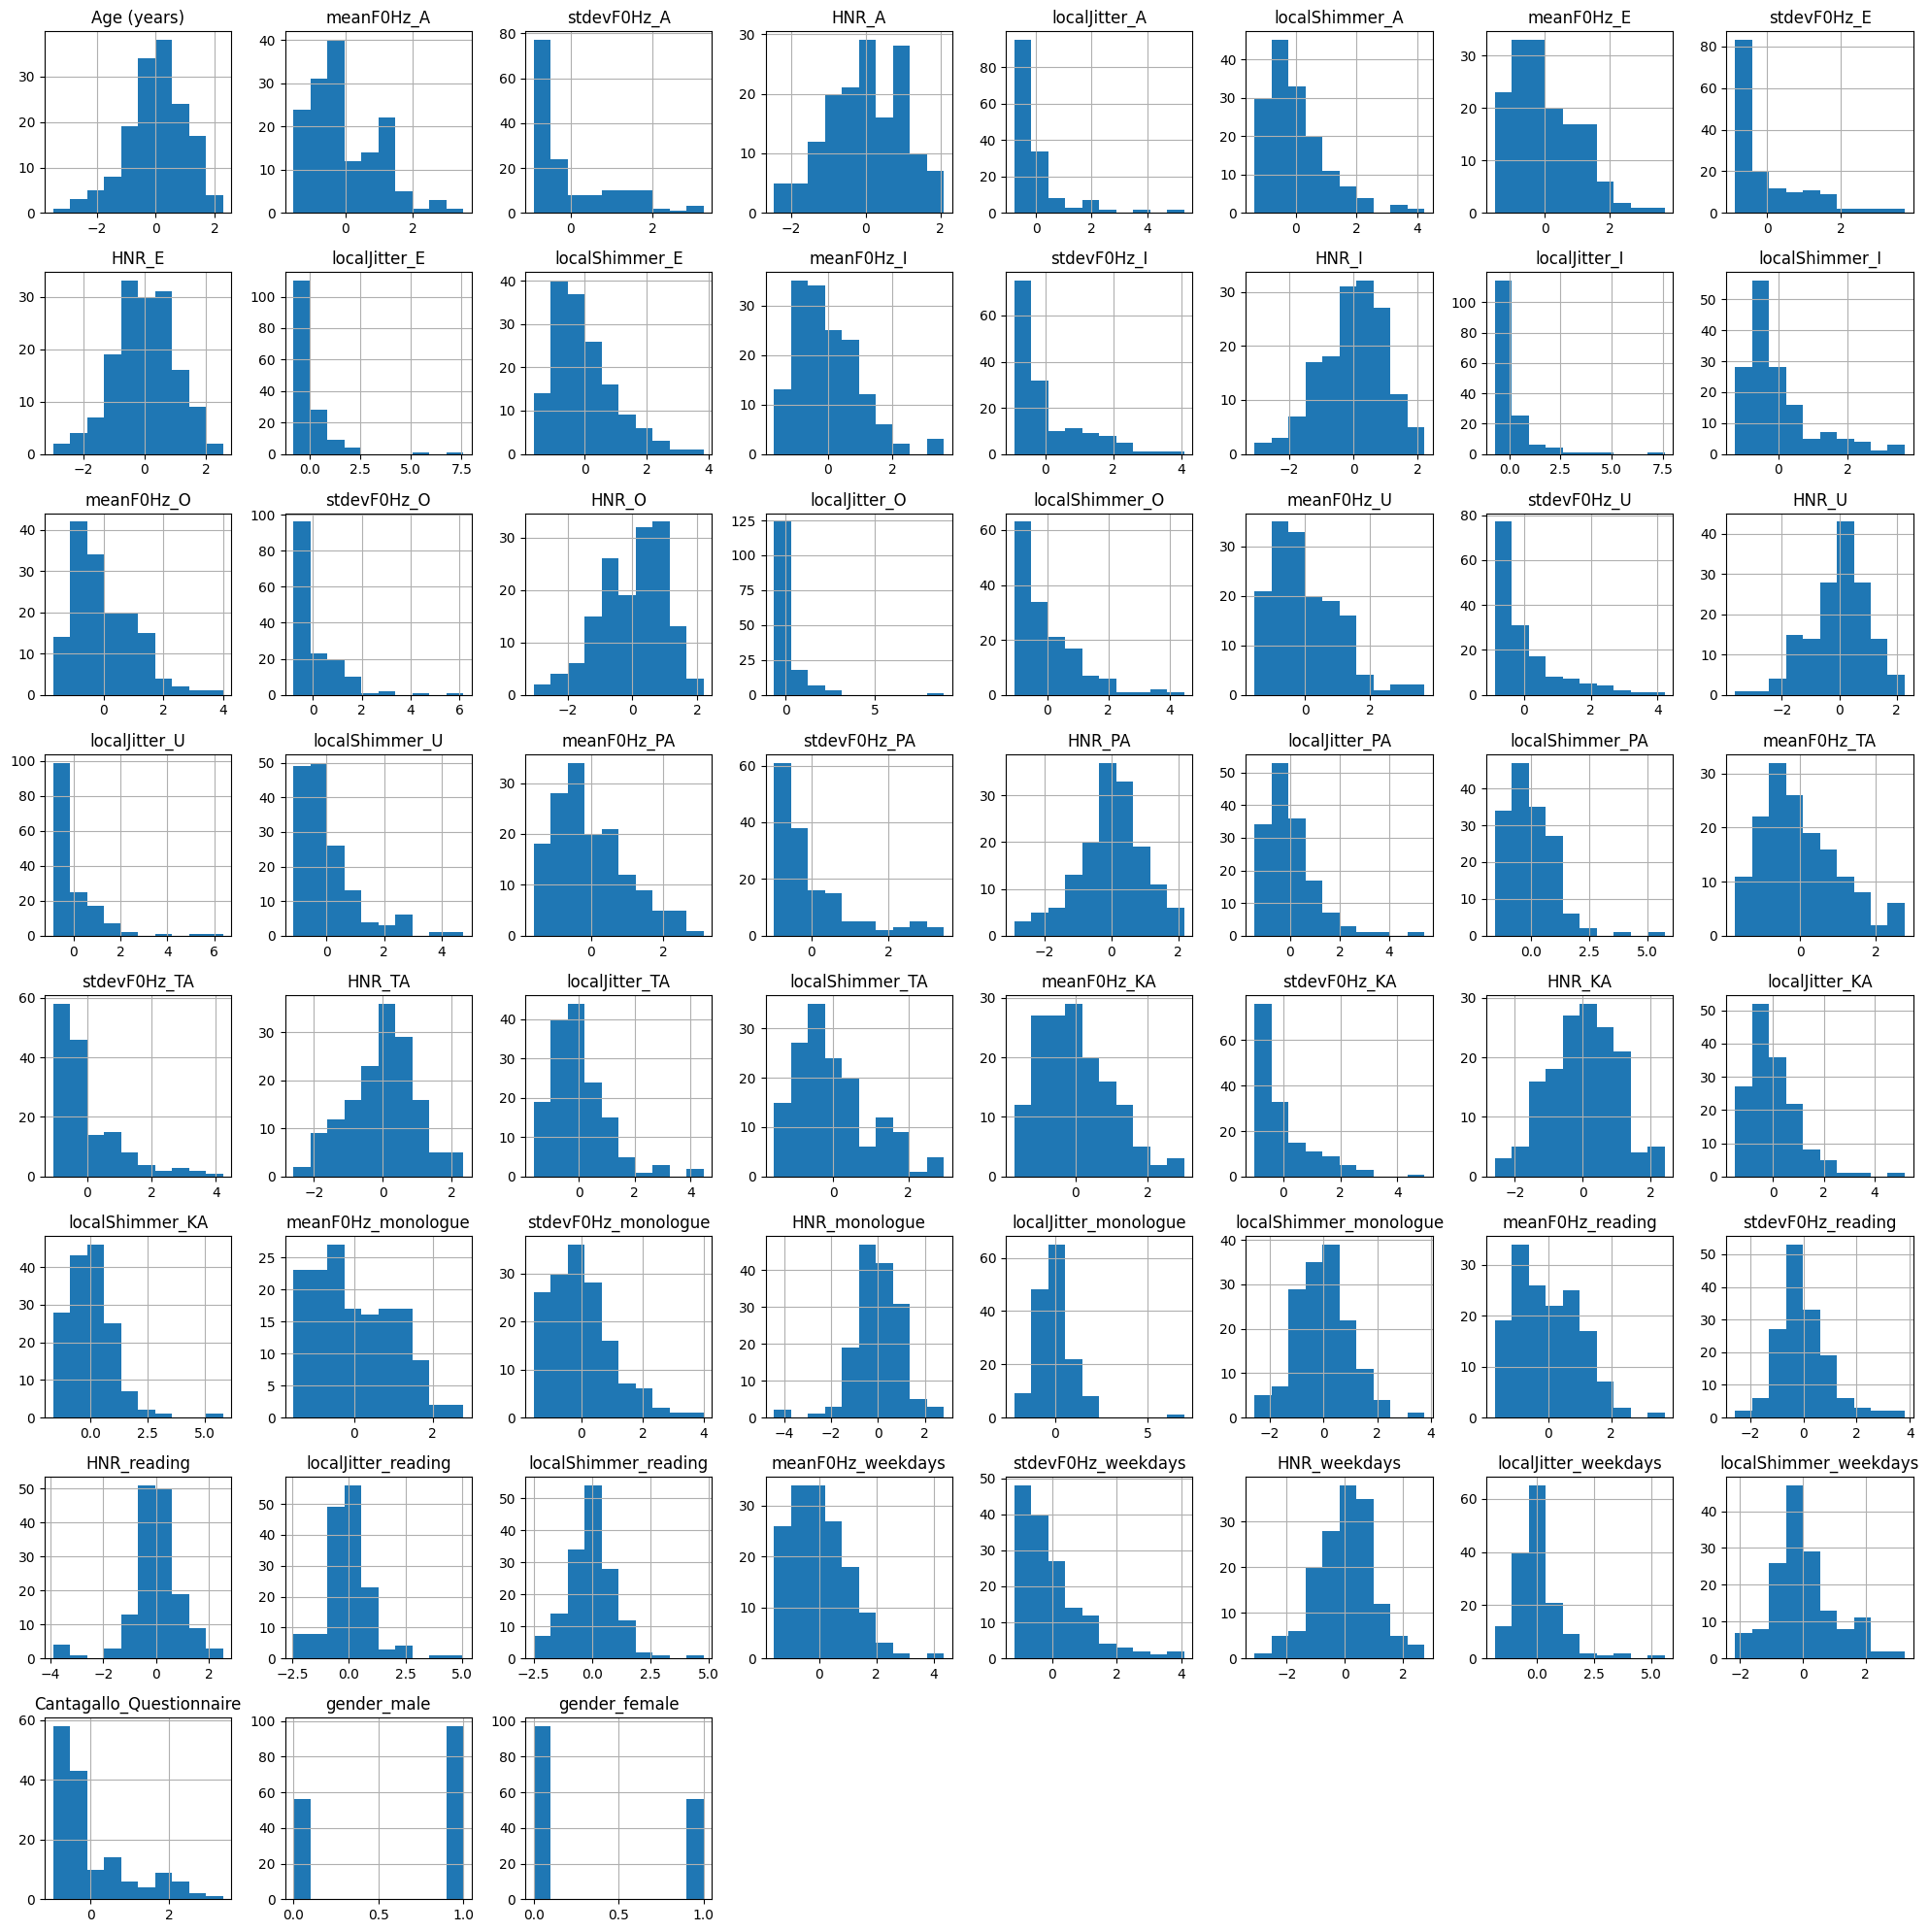

In [15]:
# do this thing again, not entirely sure why its needed dataframes are weird
for name in scaled_df.columns:
    scaled_df[name] = pd.to_numeric(scaled_df[name], errors='coerce')

scaled_df.hist(figsize=(20,20))
plt.tight_layout()

### Clean and Preprocess Function

In [16]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def prep_data(df):
    df = clean_data(df)
    df = preprocess_data(df)
    return df

def clean_data(df):
    
    # set column names as first row
    rename_map = dict([(old_name, new_name) for old_name, new_name in zip(df.axes[1], list(df.iloc[0]))])
    df = df.rename(rename_map, axis=1)

    # remove diagnostic/treatments stuff as no values for healthy participants and first row (which held the column names)
    df = pd.concat([df.iloc[:,1:4], df.iloc[:,33:]], axis=1)[1:]

    # Convert category (ALS or HC) to binary so don't have to predict a string lol
    binary_target = df["Category"] == "ALS"
    df["Category"] = binary_target

    # One-hot encode gender
    is_male = df["Sex"] == "M"
    df["gender_male"] = is_male.astype(int)
    df["gender_female"] = 1 - is_male
    df = df.drop(columns="Sex")

    # Make sure all columns are numeric so we can display them
    for name in clean_df.columns:
        clean_df[name] = pd.to_numeric(clean_df[name], errors='coerce')

    return df

def preprocess_data(df):

    # numeric features that need standardizing
    numeric_features = ["Age (years)", "meanF0Hz_A", "stdevF0Hz_A", "HNR_A", "localJitter_A", "localShimmer_A", "meanF0Hz_E", "stdevF0Hz_E", "HNR_E", "localJitter_E", "localShimmer_E", "meanF0Hz_I", "stdevF0Hz_I", "HNR_I", "localJitter_I", "localShimmer_I", "meanF0Hz_O", "stdevF0Hz_O", "HNR_O", "localJitter_O", "localShimmer_O", "meanF0Hz_U", "stdevF0Hz_U", "HNR_U", "localJitter_U", "localShimmer_U", "meanF0Hz_PA", "stdevF0Hz_PA", "HNR_PA", "localJitter_PA", "localShimmer_PA", "meanF0Hz_TA", "stdevF0Hz_TA", "HNR_TA", "localJitter_TA", "localShimmer_TA", "meanF0Hz_KA", "stdevF0Hz_KA", "HNR_KA", "localJitter_KA", "localShimmer_KA", "meanF0Hz_monologue", "stdevF0Hz_monologue", "HNR_monologue", "localJitter_monologue", "localShimmer_monologue", "meanF0Hz_reading", "stdevF0Hz_reading", "HNR_reading", "localJitter_reading", "localShimmer_reading", "meanF0Hz_weekdays", "stdevF0Hz_weekdays", "HNR_weekdays", "localJitter_weekdays", "localShimmer_weekdays", "Cantagallo_Questionnaire"]  # numerical columns
    onehot_features = ["Category", 'gender_male', 'gender_female'] # no touchy

    # standardize numeric features (not ALS diagnosis, or one hot encoded gender)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', 'passthrough', onehot_features)  # passthrough = no touchy
        ]
    )

    p = Pipeline(steps=[
        ('preprocessor', preprocessor)])

    scaled_data = p.fit_transform(df)

    # Convert back to DataFrame
    all_feature_names = numeric_features + onehot_features
    df = pd.DataFrame(scaled_data, columns=all_feature_names, index=df.index)

    # Make everything numeric
    for name in df.columns:
        df[name] = pd.to_numeric(df[name], errors='coerce')

    return df

df = prep_data(pd.read_excel('VOC-ALS.xlsx'))
df.head()

,Age (years),meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,HNR_E,localJitter_E,...,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire,Category,gender_male,gender_female
1,-0.596545,0.780900,-0.854556,0.112354,-0.586274,1.340078,0.864894,-0.639528,-0.397213,-0.497281,...,0.251266,0.526677,-0.498159,0.134135,-0.752233,0.237306,-0.712214,False,0,1
2,0.799575,0.943590,-0.677661,1.474616,-0.658861,-0.793134,0.814170,-0.546830,1.355740,-0.601093,...,-1.561406,1.257791,0.343883,1.970252,-1.514839,-1.727805,-0.944415,False,0,1
3,-0.247515,-0.245186,-0.674186,-0.648526,-0.186461,-0.562193,-0.738366,-0.406278,-2.032928,1.909601,...,-0.970929,-0.468445,-0.617694,0.757799,-0.149436,-0.801535,-0.214640,False,0,1
4,0.101515,1.049131,0.518163,0.449962,-0.464083,0.167784,0.425198,1.272075,0.532107,-0.530237,...,0.276340,1.279800,-0.446608,0.232726,0.399517,0.587947,-0.546356,False,0,1
5,-0.073000,0.925208,0.064061,1.160927,-0.259407,-0.673165,1.179024,-0.737717,0.627439,-0.576983,...,-0.165096,0.961817,0.680624,-0.024464,0.637189,0.645913,-0.844900,False,0,1


### Particle Swarm Optimization

In [17]:
from pyswarms.discrete import BinaryPSO
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import numpy as np

class PSO:
    def __init__(self, fitness, data, target, n_particles, n_features, iters):
        self.fitness = fitness
        self.data = data
        self.target = target 
        self.n_particles = n_particles
        self.n_features = n_features
        self.iters = iters

    def run(self):
        def objective_function(particles):
            return np.array([self.fitness(p, self.data, self.target) for p in particles]) * -1

        # PSO options
        options = {'c1': 2, 'c2': 2, 'w': 0.7, 'k': 7, 'p': 2, 'save_pos_history': True}

        # Initialize and run Binary PSO
        optimizer = BinaryPSO(
            n_particles=self.n_particles,
            dimensions=self.n_features,
            options=options
        )
        best_cost, best_position = optimizer.optimize(objective_function, iters=self.iters, verbose=True)

        best_fitness_over_time = [-c for c in optimizer.cost_history]
        avg_fitness_over_time = []
        for particles in optimizer.pos_history:
            avg = np.mean([self.fitness(p, self.data, self.target) for p in particles])
            avg_fitness_over_time.append(avg)

        return best_position, -best_cost, best_fitness_over_time, avg_fitness_over_time


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

def fitness_function(encoding, data, target):
    mask = data[0].columns[encoding == 1]
    reg = LogisticRegression().fit(data[0][mask], target[0])
    preds = reg.predict(data[1][mask])
    return f1_score(target[1], preds)

### Testing

In [19]:
# Split data into training, testing, and validation sets with a 60/20/20 split
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)
test_set, val_set = train_test_split(test_set, test_size=0.5, random_state=42)

train_X = train_set.drop(columns="Category")
train_y = train_set["Category"]

test_X = test_set.drop(columns="Category")
test_y = test_set["Category"]

val_X = val_set.drop(columns="Category")
val_y = val_set["Category"]

print(train_X.shape)
print(test_X.shape)
print(val_X.shape)

(91, 59)
(31, 59)
(31, 59)


In [20]:
train_y.head()

149     True
29     False
41     False
96      True
26     False
Name: Category, dtype: bool

In [21]:
from tqdm import tqdm
pso = PSO(
    fitness=fitness_function,
    data=(train_X, test_X),
    target=(train_y, test_y),
    n_particles=50,
    n_features=train_X.shape[1],
    iters=100
)

encoding, weight, best_fitness_over_time, avg_fitness_over_time = pso.run()

# Recalculate average fitness per generation
avg_fitness_over_time = []

for _ in tqdm(range(pso.iters)):
    swarm_snapshot = np.random.randint(0, 2, (pso.n_particles, pso.n_features))
    avg = np.mean([fitness_function(p, pso.data, pso.target) for p in swarm_snapshot])
    avg_fitness_over_time.append(avg)

2025-07-30 18:22:19,812 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7, 'k': 7, 'p': 2, 'save_pos_history': True}
pyswarms.discrete.binary:   0%|          |0/100

pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-0.889
2025-07-30 18:24:46,739 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -0.8888888888888888, best pos: [1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0]
100%|██████████| 100/100 [02:22<00:00,  1.43s/it]


[1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0]
0.8888888888888888


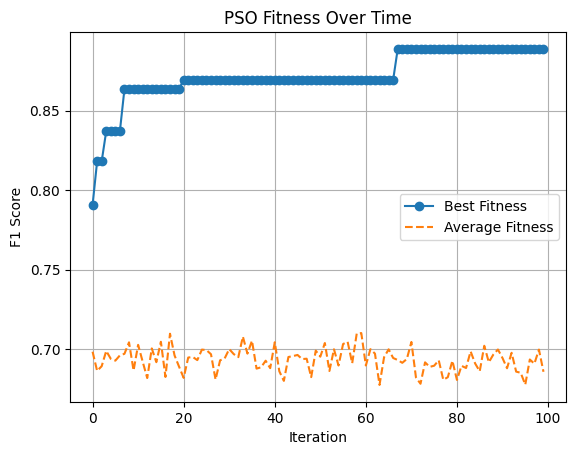

In [22]:
# Display PSO results
print(encoding)
print(weight)

plt.plot(best_fitness_over_time, label="Best Fitness", marker='o')
plt.plot(avg_fitness_over_time, label="Average Fitness", linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.title("PSO Fitness Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, fbeta_score
selected_features = train_X.columns[encoding == 1]

model = LogisticRegression(random_state=42)
model.fit(train_X[selected_features], train_y)

preds = model.predict(test_X[selected_features])

tn, fp, fn, tp = confusion_matrix(val_y, preds).ravel()
precision = precision_score(val_y, preds)
recall = recall_score(val_y, preds)
f2_score = fbeta_score(val_y, preds, beta=2)

print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")
print(f"F2 Score:  {f2_score:.4f}")

TP: 16, FP: 9, TN: 2, FN: 4
Precision: 0.640, Recall: 0.800
F2 Score:  0.7619


In [24]:
selected_features = train_X.columns[encoding == 1].tolist()
num_selected_features = len(selected_features)

results = pd.DataFrame({
    "Method": ["PSO"],
    "F1 Score": [weight],
    "Number of Features": [num_selected_features],
    "Selected Features": [selected_features]
})

print(results.to_string(index=False))

Method  F1 Score  Number of Features                                                                                                                                                                                                                                                                                                                                                                                                                                        Selected Features
   PSO  0.888889                  30 [Age (years), meanF0Hz_A, localJitter_A, meanF0Hz_E, stdevF0Hz_E, HNR_E, localJitter_E, stdevF0Hz_I, HNR_I, localShimmer_I, meanF0Hz_O, localJitter_O, localShimmer_O, localJitter_U, meanF0Hz_PA, HNR_PA, localShimmer_PA, meanF0Hz_TA, stdevF0Hz_TA, meanF0Hz_KA, HNR_KA, localJitter_KA, localShimmer_KA, stdevF0Hz_monologue, HNR_monologue, localJitter_monologue, meanF0Hz_weekdays, localShimmer_weekdays, Cantagallo_Questionnaire, gender_male]


In [25]:
# Test encoding on validation set
fitness_function(encoding, (train_X, val_X), (train_y, val_y))

0.8

### Random Dummy

In [26]:
# test n random encodings and return the one with the best fitness
def random_dummy(n, fitness, data, target, n_features):
    individuals = np.random.randint(0, 2, (n, n_features))
    weights = np.array([fitness(ind, data, target) for ind in individuals])
    idx = np.argmax(weights)
    return individuals[idx], weights[idx]

total_individuals = pso.iters * pso.n_particles
dummy_encoding, dummy_weight = random_dummy(total_individuals, fitness_function, (train_X, test_X), (train_y, test_y), pso.n_features)

In [27]:
print("Best Random Encoding:\n", dummy_encoding)
print("Best F1 Score:", dummy_weight)

Best Random Encoding:
 [0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0]
Best F1 Score: 0.8695652173913043


In [28]:
# Test encoding on validation set
val_score_dummy = fitness_function(dummy_encoding, (train_X, val_X), (train_y, val_y))
print("Validation F1 Score (Random Dummy):", val_score_dummy)

Validation F1 Score (Random Dummy): 0.8095238095238095


### Repeated Tests

In [29]:
n = 10
pso_weights = []
random_weights = []

pso_num_features = []
random_num_features = []

tp_list, fp_list, tn_list, fn_list = [], [], [], []
precision_list, recall_list, f2_list = [], [], []

# PSO
for i in range(n):
    pso = PSO(
    fitness=fitness_function,
    data=(train_X, test_X),
    target=(train_y, test_y),
    n_particles=50,
    n_features=train_X.shape[1],
    iters=100
)
    encoding, _, _, _ = pso.run()
    
    # append score on validation set
    weight = fitness_function(encoding, (train_X, val_X), (train_y, val_y))
    pso_weights.append(weight)

    pso_num_features.append(np.sum(encoding))

    selected_features = np.where(encoding == 1)[0]
    model = LogisticRegression()
    model.fit(train_X.values[:, selected_features], train_y.values)
    y_pred = model.predict(val_X.values[:, selected_features])

    tn, fp, fn, tp = confusion_matrix(val_y, y_pred).ravel()
    precision = precision_score(val_y, y_pred, zero_division=0)
    recall = recall_score(val_y, y_pred, zero_division=0)
    f2 = (5 * precision * recall) / (4 * precision + recall + 1e-10)

    tp_list.append(tp)
    fp_list.append(fp)
    tn_list.append(tn)
    fn_list.append(fn)
    precision_list.append(precision)
    recall_list.append(recall)
    f2_list.append(f2)

# Random dummy
total_individuals = pso.iters * pso.n_particles
for i in range(n):
    dummy_encoding, _ = random_dummy(
    total_individuals,
    fitness_function,
    (train_X, test_X),
    (train_y, test_y),
    pso.n_features
    )

    # append score on validation set
    dummy_weight = fitness_function(dummy_encoding, (train_X, val_X), (train_y, val_y))
    random_weights.append(dummy_weight)

    random_num_features.append(np.sum(dummy_encoding))

2025-07-30 18:32:02,062 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7, 'k': 7, 'p': 2, 'save_pos_history': True}


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-0.905
2025-07-30 18:34:25,098 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -0.9047619047619048, best pos: [1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1]
2025-07-30 18:36:49,201 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7, 'k': 7, 'p': 2, 'save_pos_history': True}
pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-0.905
2025-07-30 18:39:23,121 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -0.9047619047619048, best pos: [0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0]
2025-07-30 18:41:56,021 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7, 'k': 7, 'p': 2, 'save_pos_history': True}
pyswarms.discrete.binary: 100%|██████████|100/100, b

PSO average: 0.8221828773105007
Dummy average: 0.8339820163892405
  TP: 18, FP: 5, TN: 6, FN: 2
  Precision: 0.783, Recall: 0.900
  F2 Score:  0.8738
PSO F1 scores: [0.8444444444444444, 0.8181818181818182, 0.8780487804878049, 0.8, 0.8181818181818182, 0.7619047619047619, 0.8095238095238095, 0.8636363636363636, 0.7906976744186046, 0.8372093023255814]
Random Dummy F1 scores: [0.8636363636363636, 0.8372093023255814, 0.8095238095238095, 0.8372093023255814, 0.8, 0.8444444444444444, 0.8095238095238095, 0.8372093023255814, 0.85, 0.851063829787234]
PSO number of features: [np.int64(32), np.int64(31), np.int64(27), np.int64(29), np.int64(20), np.int64(23), np.int64(23), np.int64(24), np.int64(29), np.int64(29)]
Random Dummy number of features: [np.int64(26), np.int64(27), np.int64(26), np.int64(27), np.int64(27), np.int64(23), np.int64(31), np.int64(29), np.int64(27), np.int64(26)]
PSO TP: [np.int64(19), np.int64(18), np.int64(18), np.int64(16), np.int64(18), np.int64(16), np.int64(17), np.int64

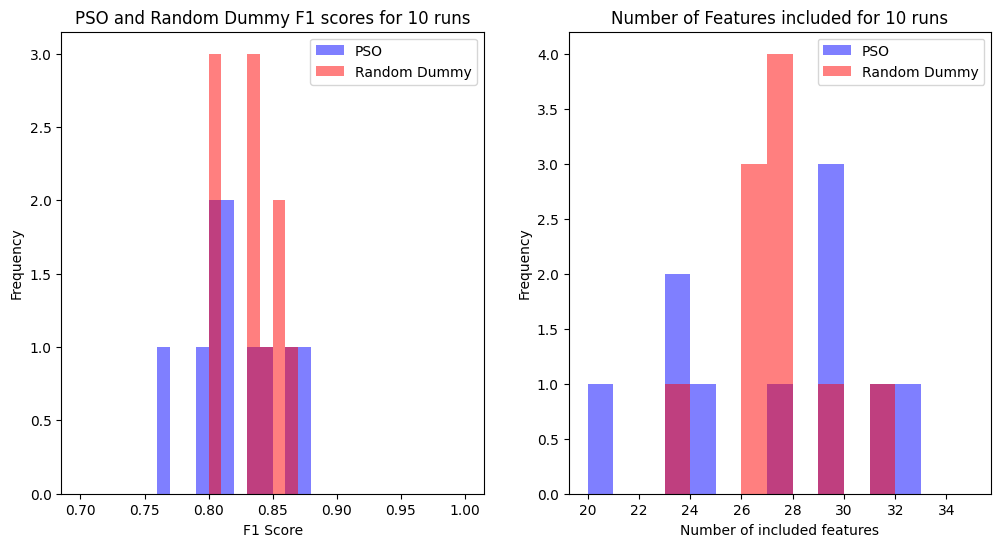

In [30]:

# Display results from n runs
print(f"PSO average: {np.mean(pso_weights)}")
print(f"Dummy average: {np.mean(random_weights)}")

print(f"  TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
print(f"  Precision: {precision:.3f}, Recall: {recall:.3f}")
print(f"  F2 Score:  {f2:.4f}")

# Print arrays of results
print("PSO F1 scores:", pso_weights)
print("Random Dummy F1 scores:", random_weights)
print("PSO number of features:", pso_num_features)
print("Random Dummy number of features:", random_num_features)

print("PSO TP:", tp_list)
print("PSO FP:", fp_list)
print("PSO TN:", tn_list)
print("PSO FN:", fn_list)
print("PSO Precision:", [round(p, 3) for p in precision_list])
print("PSO Recall:", [round(r, 3) for r in recall_list])
print("PSO F2 scores:", [round(f, 4) for f in f2_list])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# F1 Score plot
axs[0].hist(pso_weights, color="blue", label="PSO", alpha=0.5, bins=30, range=(0.7, 1.0))
axs[0].hist(random_weights, color="red", label="Random Dummy", alpha=0.5, bins=30, range=(0.7, 1.0))
axs[0].set_xlabel("F1 Score")
axs[0].set_ylabel("Frequency")
axs[0].set_title(f"PSO and Random Dummy F1 scores for {n} runs")
axs[0].legend()

# Number of features plot
axs[1].hist(pso_num_features, color="blue", label="PSO", alpha=0.5, bins=15, range=(20, 35))
axs[1].hist(random_num_features, color="red", label="Random Dummy", alpha=0.5, bins=15, range=(20, 35))
axs[1].set_xlabel("Number of included features")
axs[1].set_ylabel("Frequency")
axs[1].set_title(f"Number of Features included for {n} runs")
axs[1].legend()

### Classification Algs

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
reg = LogisticRegression(max_iter=10000).fit(train_X, train_y)
preds = reg.predict(test_X)
print(f1_score(test_y, preds))
print(confusion_matrix(test_y, preds))

0.631578947368421
[[ 5  6]
 [ 8 12]]


In [33]:
clf = LinearSVC(random_state=0).fit(train_X, train_y)
preds = clf.predict(test_X)
f1_score(test_y, preds)

0.5555555555555556

In [34]:
train_X[[train_X.axes[1][0]]]

,Age (years)
149,-0.334772
29,1.148605
41,-0.858317
96,0.799575
26,-1.643634
...,...
72,1.323120
107,-1.032832
15,-0.160257
93,-0.858317


In [ ]:
for i in range(train_X.shape[1]):
    reg = LogisticRegression().fit(train_X[[train_X.axes[1][i]]], train_y)
    preds = reg.predict(test_X[[train_X.axes[1][i]]])
    print(f"{i} {train_X.axes[1][i]}: {f1_score(preds, test_y)}")

0 Age (years): 0.7843137254901961
1 meanF0Hz_A: 0.7843137254901961
2 stdevF0Hz_A: 0.7843137254901961
3 HNR_A: 0.7843137254901961
4 localJitter_A: 0.7843137254901961
5 localShimmer_A: 0.7843137254901961
6 meanF0Hz_E: 0.7843137254901961
7 stdevF0Hz_E: 0.7843137254901961
8 HNR_E: 0.7843137254901961
9 localJitter_E: 0.7843137254901961
10 localShimmer_E: 0.7843137254901961
11 meanF0Hz_I: 0.7843137254901961
12 stdevF0Hz_I: 0.7843137254901961
13 HNR_I: 0.7843137254901961
14 localJitter_I: 0.7843137254901961
15 localShimmer_I: 0.7843137254901961
16 meanF0Hz_O: 0.7843137254901961
17 stdevF0Hz_O: 0.7843137254901961
18 HNR_O: 0.7843137254901961
19 localJitter_O: 0.7843137254901961
20 localShimmer_O: 0.7843137254901961
21 meanF0Hz_U: 0.7843137254901961
22 stdevF0Hz_U: 0.7843137254901961
23 HNR_U: 0.7843137254901961
24 localJitter_U: 0.7843137254901961
25 localShimmer_U: 0.7843137254901961
26 meanF0Hz_PA: 0.7843137254901961
27 stdevF0Hz_PA: 0.7843137254901961
28 HNR_PA: 0.7843137254901961
29 localJ

: 